# K-armed bandit
This notebook implements k-armed bandit and four agents:
- Random agent
- $\epsilon$-greedy agent
- Optimistic agent
- Upper confidence bound agent

The purpose of the notebook is to get you a good understanding of:
- K-armed bandit problems
- Exploration vs exploitation tradeoff
- $\epsilon$-greedy action selection method
- Optimistic action selection method
- Upper confidence bound action selection method

## This is a graded assignment
To pass the assinment, you are expected to:
- perform all the code tasks, namely implement optimistic and ucb agents
- understand the topics behind this code, that were covered in a lecture
- present your code to the teacher and answer the questions

### Related reading from the Reinforcement Learning book
- Chapter 2-2.7 (Pages 25-36)


In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

### Bandit class
This class implements a k-armed bandit

In [2]:
class Bandit:
    def __init__(self, q_star, stddev = 2):  
        """
            Arguments:
                k      - number of arms
                minq   - minimum value of q_star for each arm
                maxq   - maximum value of q_star for each arm
                stddev - standard deviation that randomize the values while action is executed
        """
        self.stddev = stddev
        self.q_star = q_star
                
    def execute(self, arm):
        """
        Returns the state of the bandit (randomly seleted value for a given arm)
        Arguments:
            arm - number of arm to be pulled
        """
        return self.q_star[arm] + np.random.normal(scale=self.stddev)
    
    
    
    

Create a bandit object

In [3]:
bandit = Bandit([4, 5, 3, 3, 1, 2, 0, 1, 5, 1])
print (bandit.q_star)
print(bandit.execute(6))
print(bandit.q_star[2])

[4, 5, 3, 3, 1, 2, 0, 1, 5, 1]
0.6609024262826284
3


### Random agent
Agent that acts randomly

Parameters:
- `q_est` - estimated $q_{\star}$ values for each arm
- `n` - how many times each arm was selected

Methods:
- `act(self, bandit)` - performs an action (selects an arm randomly) and updates coresponding $Q$ and $n$ values. $Q$ is updated according to the formula:

$Q_{n+1} = Q{n} + \frac{1}{n}(R_n-Q_n)$

where:
- $Q_{n}$ - current estimated $q_{\star}$ value
- $Q_{n+1}$ - new estimated $q_{\star}$ value
- $R_n$ - reward obtained for an action $n$
- $n$ - number of actions (computed separately for each action type)

In [4]:
class RandomAgent:
    def __init__(self, bandit):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
        """
        self.q_est =  [0] * len(bandit.q_star)
        self.n =  [0] * len(bandit.q_star)
                
    def act(self, bandit):
        """
        Performs an action (selects an arm randomly) and updates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """
        arm = np.random.randint(len(self.q_est))
        reward = bandit.execute(arm)
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

Let's run the agent and see how it works

In [5]:
agent = RandomAgent(bandit)
rewards = []
for step in range (1000):
    reward = agent.act(bandit)
    rewards.append(reward)
    
 

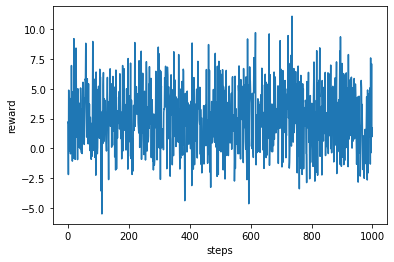

In [6]:
def plot_rewards (rewards):
    """
    Plots the rewards
    """
    f = plt.figure()
    plt.plot(rewards)
    plt.xlabel('steps')
    plt.ylabel('reward')
    plt.show()
    
plot_rewards(rewards)

In [7]:

def display_agent(agent, bandit):
    """
    Displays the agent data, namely:
    q_star - real expected rewards from the bandit
    q_est  - expected rewards extimated by the agent
    n      - how many times the agent selected this particular arm
    """
    df = pd.DataFrame()
    df['q_star'] = bandit.q_star
    df['q_est'] = agent.q_est
    df['n'] = agent.n
    return df

display_agent(agent, bandit)

,q_star,q_est,n
0,4,3.753568,97
1,5,4.916629,125
2,3,2.851073,105
3,3,3.039148,95
4,1,1.175949,109
5,2,1.952775,103
6,0,0.350506,91
7,1,0.953712,101
8,5,5.073506,87
9,1,0.759672,87


## $\epsilon$-greedy Agent

In [40]:
class EpsilonGreedyAgent:
    def __init__(self, bandit, epsilon = 0.1):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
            epsilon - exploration parameter 
        """        
        self.q_est = [0] * len(bandit.q_star)
        self.n =  [0] * len(bandit.q_star)
        self.epsilon = epsilon
        
    def act(self, bandit):
        """
        Performs an action (uses epsilon-greedy approach to select an arm)
        and pdates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """        
        if np.random.random() > self.epsilon:
            arm = np.argmax(self.q_est)
        else:
            arm = np.random.randint(len(self.q_est))
        reward = bandit.execute(arm)
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

Let's train the agent n times (1000 steps each time) to see how it works

In [41]:
total_rewards = []
for loop in tqdm(range (1000)):
    agent = EpsilonGreedyAgent(bandit)
    rewards = []
    for step in range (1000):
        reward = agent.act(bandit)
        rewards.append(reward)
    
    total_rewards.append(rewards)
total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)
print (rewards.shape)

100%|██████████| 1000/1000 [00:22<00:00, 45.09it/s]

(1000,)


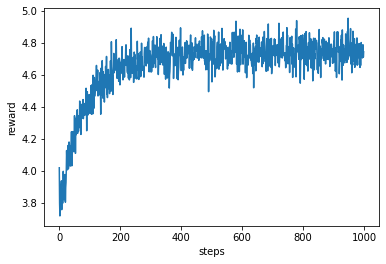

,q_star,q_est,n
0,4,3.948410,77
1,5,4.787912,11
2,3,3.417247,16
3,3,3.400311,10
4,1,0.617985,9
5,2,1.894447,8
6,0,0.352217,9
7,1,0.776601,7
8,5,5.000271,839
9,1,0.648760,14


In [42]:
plot_rewards(rewards)
display_agent(agent, bandit)

Let's display how the $\epsilon$-greedy agent works.

*Note: We trained many agents, and the displayed reward is the average of the rewards obrained by all the agents. However, the dataframe contains only the data for the latest agent*

We may save the rewards for future comparisons

In [28]:
df_rewards = pd.DataFrame()
df_rewards['eGreedy'] = rewards

## Task 1  - Optimistic agent
Please fill in the placeholders to implement the optimistic agent.
Generally, you are suppose to prepate the `__init__` and `act` methods.
- In the `__init__` method you should set the initial values optimistically.
- In the `act` method you should:
    - Perform an action (select the arm greedily based on the estimated $q_{\star}$ values) 
    - Update the corresponding estimated $q_{\star}$ value

In [14]:
class OptimisticAgent:
    def __init__(self, bandit, initial_value = 10):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
            initial_value - initial value for estimated q_star. It should be high enough to make the algorithm work
        """
        
        self.q_est =[initial_value] * len(bandit.q_star)
        self.n =  [1] * len(bandit.q_star)
                
    def act(self, bandit):
        """
        Performs an action (selects an arm greedily based on the estimated q_star values ) 
        and updates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """
        
        arm = np.argmax(self.q_est)
        reward = bandit.execute(arm)
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

Agent traning

In [30]:
bandit = Bandit([4, 5, 3, 3, 1, 2, 0, 1, 5, 1])
total_rewards = []
for loop in tqdm(range (1000)):
    agent = OptimisticAgent(bandit)
    rewards = []
    for step in range (1000):
        reward = agent.act(bandit)
        rewards.append(reward)
    
    total_rewards.append(rewards)
total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)


100%|██████████| 1000/1000 [00:21<00:00, 46.94it/s]


Optimistic agent results visualization

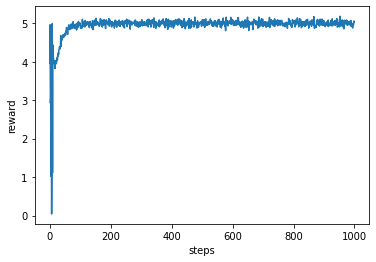

,q_star,q_est,n
0,4,4.690597,9
1,5,5.135673,690
2,3,4.249581,4
3,3,4.523975,5
4,1,4.855710,4
5,2,4.870894,4
6,0,4.825415,2
7,1,4.620384,3
8,5,4.880406,286
9,1,3.791587,3


In [31]:
df_rewards['optimistic'] = rewards # Let's store the results for comparison
plot_rewards(rewards)
display_agent(agent, bandit)

## Task 2  - Upper Confidence Bound agent

Please fill in the placeholders to implement the UCB agent.
Generally, you are suppose to prepate the `act` method. In this method you are supposed to:
- Compute the optimistic estimated $q_{\star}$ values for each action, according to the formula:
$Q_{optimistic}(a) = Q_{estimated}(a) + c \sqrt{\frac{ln(t)}{N_t(a)}}$ where:
    - $a$ - selected action
    - $Q_{estimated}(a)$ - estimated $q_{\star}$ value for action $a$
    - $c$ - explorarion parameter
    - $t$ - number of all steps taken so far
    - $N_t(a)$ - number of times when action $a$ was selected
- Perform an action (select the arm greedily based on the estimated $Q_{optimistic}$ values) 
- Update the corresponding estimated $q_{\star}$ value

In [17]:
class UCBAgent:
    def __init__(self, bandit, c = 3):
        self.q_est =  [0] * len(bandit.q_star)
        self.n = [1] * len(bandit.q_star)
        self.c = c
        
    def act(self, bandit): 
        # Calculate Q optimistic here
        q_opt=[0]*len(self.q_est)
        for i in range(len(self.q_est)):
             q_opt[i]= self.q_est[i]+self.c*np.sqrt(np.log(sum(self.n))/self.n[i])   
        # Enter your code here (probably you need more than one line of code)
        arm = np.argmax(q_opt)
        reward = bandit.execute(arm)
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

In [18]:
agent = UCBAgent(bandit)
rewards = []
for i in range (1000):
        reward = agent.act(bandit)
        rewards.append(reward)

Agent traning

In [32]:
total_rewards = []
for loop in tqdm(range (1000)):
    agent = UCBAgent(bandit)
    rewards = []
    for i in range (1000):
        reward = agent.act(bandit)
        rewards.append(reward)
    
    total_rewards.append(rewards)
total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)
print (rewards.shape)

100%|██████████| 1000/1000 [01:36<00:00, 10.40it/s]


(1000,)


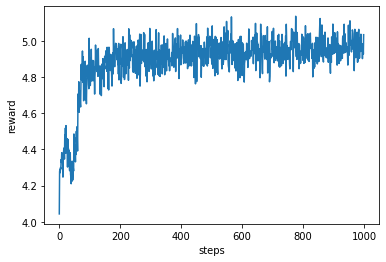

,q_star,q_est,n
0,4,4.256453,47
1,5,5.101232,566
2,3,1.608438,5
3,3,1.296824,5
4,1,0.636543,3
5,2,-0.256650,3
6,0,0.832451,3
7,1,0.647831,3
8,5,5.046880,371
9,1,1.012937,4


In [34]:
df_rewards['UCB'] = rewards # Let's store the results for comparison
plot_rewards(rewards)
display_agent(agent, bandit)

## Task 3 - understanding the code

See the results of all agents as well as the comparison below. Try to understand the results. To get the better understanding you may experiment with the code. For example, you may:
- Modify the k-armed bandit by changeing the real $Q_{\star}$ values and/or the standard deviation.
- Change the $\epsilon$ parameter in $\epsilon$-greedy agent and see how it impacts the behaviour of the agent
- Change the initial values for the optimistic agent and see how it impacts the behaviour of the agent
- Change exploration parameter $c$ for the UCB agent and see how it impacts the behaviour of the agent

<AxesSubplot:>

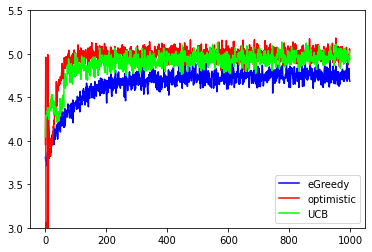

In [35]:
df_rewards.plot(colormap = 'brg', ylim=[3, 5.5])